In [34]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

<h1>Exploratory Data Analysis<h1>

In [35]:
census = pd.read_csv("Family Income and Expenditure.csv")

In [36]:
#getting the objects dtypes columns 
object_cols = census.select_dtypes(include=['object']).columns.tolist()
object_cols

#converting objects into category 
for column in object_cols:
    census[column] = census[column].astype('category')

census.dtypes.head(4)
census['Region'] = census['Region'].str.strip()  # Remove leading/trailing whitespace


In [ ]:
census['Total Household Income (monthly)'] = census['Total Household Income'] / 12
def classify_income(income):
    if income < 13873:
        return 'Poor'
    elif income < 28000:        
        return 'Low-Income (non-poor)'
    elif income < 55000:
        return 'Lower Middle-Income'
    elif income < 97000:
        return 'Middle Middle-Income'
    elif income < 166000:
        return 'Upper Middle-Income'
    elif income < 277000:
        return 'Upper-Income (non-rich)'
    else:
        return 'Rich'

# Apply it to your DataFrame
census['Income Class'] = census['Total Household Income (monthly)'].apply(classify_income)


In [ ]:
luzon_list = [
    'CAR',                
    'NCR',                
    'I - Ilocos Region',
    'II - Cagayan Valley',
    'III - Central Luzon',
    'IVA - CALABARZON',
    'IVB - MIMAROPA',
    'V - Bicol Region'
]

luzon = census[census['Region'].isin(luzon_list)]

visayas_regions_list = ['VI - Western Visayas', 'VII - Central Visayas', 'VIII - Eastern Visayas']
visayas = census[census['Region'].isin(visayas_regions_list)]

# Now filter with clean comparison list
mindanao_regions_list = [
    'Caraga',
    'ARMM',
    'X - Northern Mindanao',
    'XI - Davao Region',
    'XII - SOCCSKSARGEN',
    'IX - Zamboanga Peninsula'
]

mindanao = census[census['Region'].isin(mindanao_regions_list)]

In [63]:
def assign_island_group(region):
    luzon = [
        'CAR', 'NCR', 'I - Ilocos Region', 'II - Cagayan Valley',
        'III - Central Luzon', 'IVA - CALABARZON',
        'IVB - MIMAROPA', 'V - Bicol Region'
    ]
    visayas = [
        'VI - Western Visayas', 'VII - Central Visayas', 'VIII - Eastern Visayas'
    ]
    mindanao = [
        'IX - Zamboanga Peninsula', 'X - Northern Mindanao',
        'XI - Davao Region', 'XII - SOCCSKSARGEN', 'Caraga', 'ARMM','IX - Zasmboanga Peninsula'
    ]
    
    if region in luzon:
        return 'Luzon'
    elif region in visayas:
        return 'Visayas'
    elif region in mindanao:
        return 'Mindanao'
    else:
        return 'Unknown'

# Apply the function to create a new column
census['Island Group'] = census['Region'].apply(assign_island_group)


Series([], Name: count, dtype: int64)

<h2>What region have the highest number of poverty in different three main island<h2>

<h2>Insight 1. In all three major island groups – Luzon, Visayas, and Mindanao – the poorest segments of society represent the largest portion of the population.<h2>

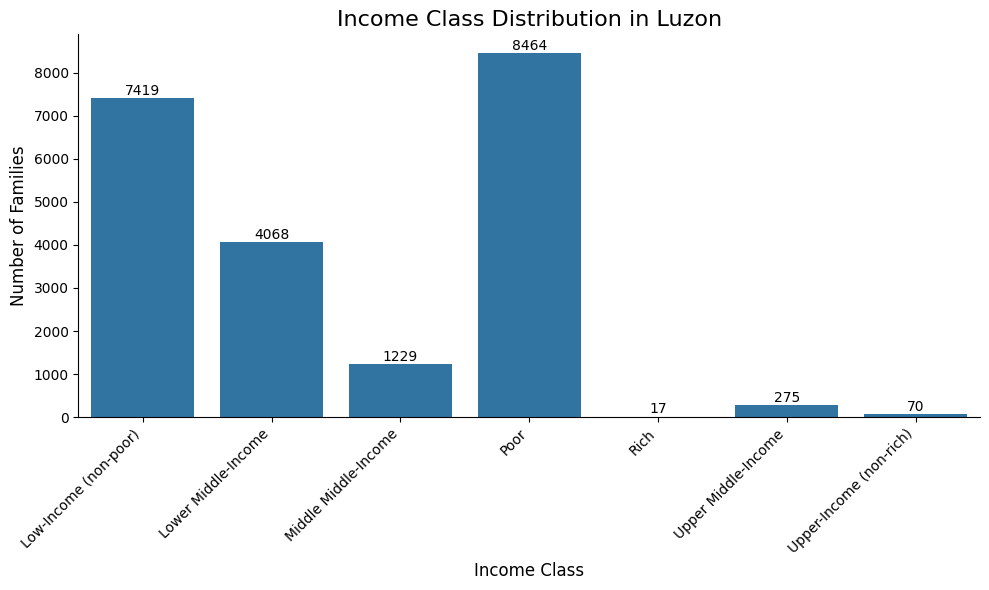

In [55]:
luzon_income_clas = luzon.groupby(['Income Class']).size()
plt.figure(figsize=(10, 6))
sns.barplot(x=luzon_income_clas.index, y=luzon_income_clas.values)

plt.title('Income Class Distribution in Luzon', fontsize=16)
plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Number of Families', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for index, value in enumerate(luzon_income_clas.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

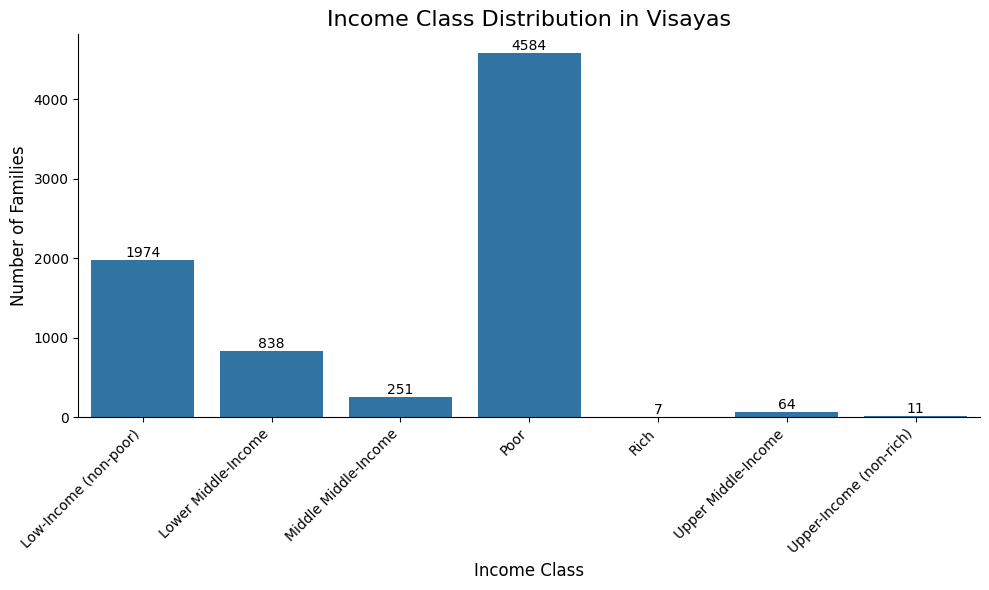

In [56]:
visayas_income_clas = visayas.groupby(['Income Class']).size()
plt.figure(figsize=(10, 6))
sns.barplot(x=visayas_income_clas.index, y=visayas_income_clas.values)

plt.title('Income Class Distribution in Visayas', fontsize=16)
plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Number of Families', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for index, value in enumerate(visayas_income_clas.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

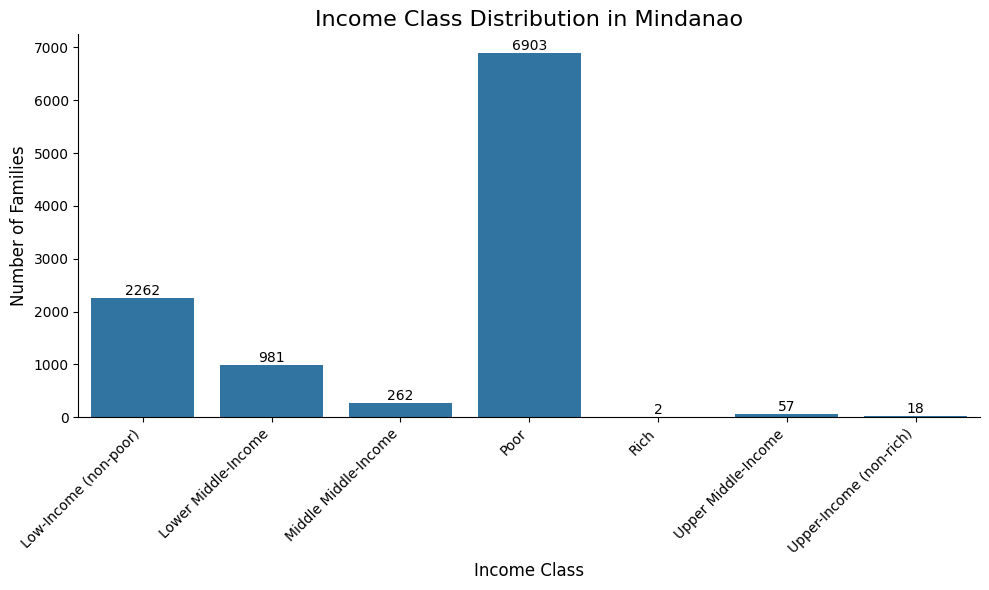

In [57]:
mindanao_income_clas = mindanao.groupby(['Income Class']).size()
plt.figure(figsize=(10, 6))
sns.barplot(x=mindanao_income_clas.index, y=mindanao_income_clas.values)

plt.title('Income Class Distribution in Mindanao', fontsize=16)
plt.xlabel('Income Class', fontsize=12)
plt.ylabel('Number of Families', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

for index, value in enumerate(mindanao_income_clas.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

sns.despine()
plt.tight_layout()
plt.show()

<h2>Insight 2. With a poverty rate of 39.29%, a significant portion of Luzon's population is classified as living in poverty, although this is lower than the rates observed in Mindanao (65.83%) and Visayas (59.31%).<h2>

In [69]:
census['Island Group'].value_counts()

Island Group
Luzon       21542
Mindanao    12273
Visayas      7729
Name: count, dtype: int64

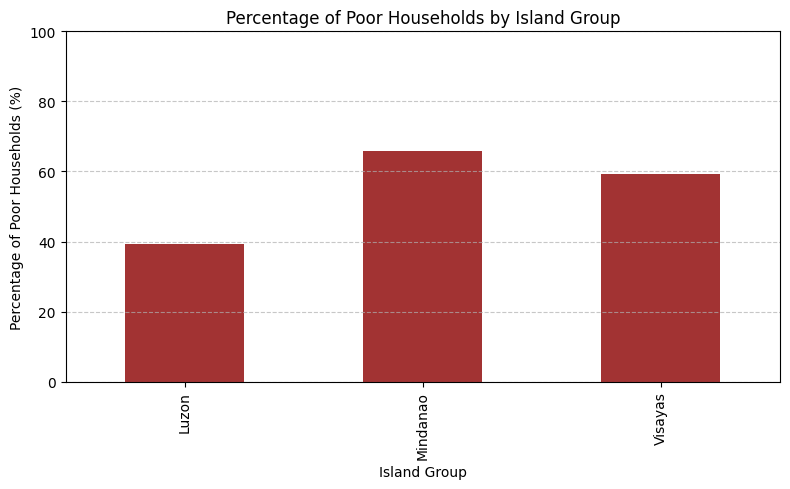

In [66]:
poor_households = census[census["Income Class"] == "Poor"]

total_by_island = census["Island Group"].value_counts()

poor_by_island = poor_households["Island Group"].value_counts()

poor_percentage = (poor_by_island / total_by_island * 100).round(2)

plt.figure(figsize=(8, 5))
poor_percentage.plot(kind="bar", color="darkred", alpha=0.8)
plt.title("Percentage of Poor Households by Island Group")
plt.xlabel("Island Group")
plt.ylabel("Percentage of Poor Households (%)")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

<h2>In luzon do NCR have the highest number of poverty?<h2>

In [ ]:
luzon_income_clas = luzon.groupby(['Region','Income Class']).size()
luzon_income_clas
# plt.figure(figsize=(10, 6))
# sns.barplot(x=luzon_income_clas.index, y=luzon_income_clas.values)
luzon_income_clas
# plt.title('Income Class Distribution in luzon', fontsize=16)
# plt.xlabel('Income Class', fontsize=12)
# plt.ylabel('Number of Families', fontsize=12)
# plt.xticks(rotation=45, ha='right', fontsize=10)

# for index, value in enumerate(luzon_income_clas.values):
#     plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# sns.despine()
# plt.tight_layout()
# plt.show()

Region               Income Class           
CAR                  Low-Income (non-poor)       553
                     Lower Middle-Income         309
                     Middle Middle-Income         92
                     Poor                        753
                     Rich                          1
                     Upper Middle-Income          15
                     Upper-Income (non-rich)       2
I - Ilocos Region    Low-Income (non-poor)       789
                     Lower Middle-Income         320
                     Middle Middle-Income         91
                     Poor                       1129
                     Rich                          1
                     Upper Middle-Income          17
                     Upper-Income (non-rich)       1
II - Cagayan Valley  Low-Income (non-poor)       739
                     Lower Middle-Income         287
                     Middle Middle-Income         71
                     Poor                       1104
 

<h2>1. Regional Cost of Living: Where Survival Is Hardest</h2>


In [39]:
#jp1  (example update ni steven)

<h2>2. The Regional “Saving Gap”: Which Regions Can Actually Save?</h2>


In [40]:
#jp2

<h2>3. Are Rural or Urban Households More Financially Vulnerable?</h2>


In [41]:
#jp3

<h2>4. The Hidden Poverty Behind the Walls</h2>


In [42]:
#jp4

<h2>5. “Imputed Rental” Inequality</h2>


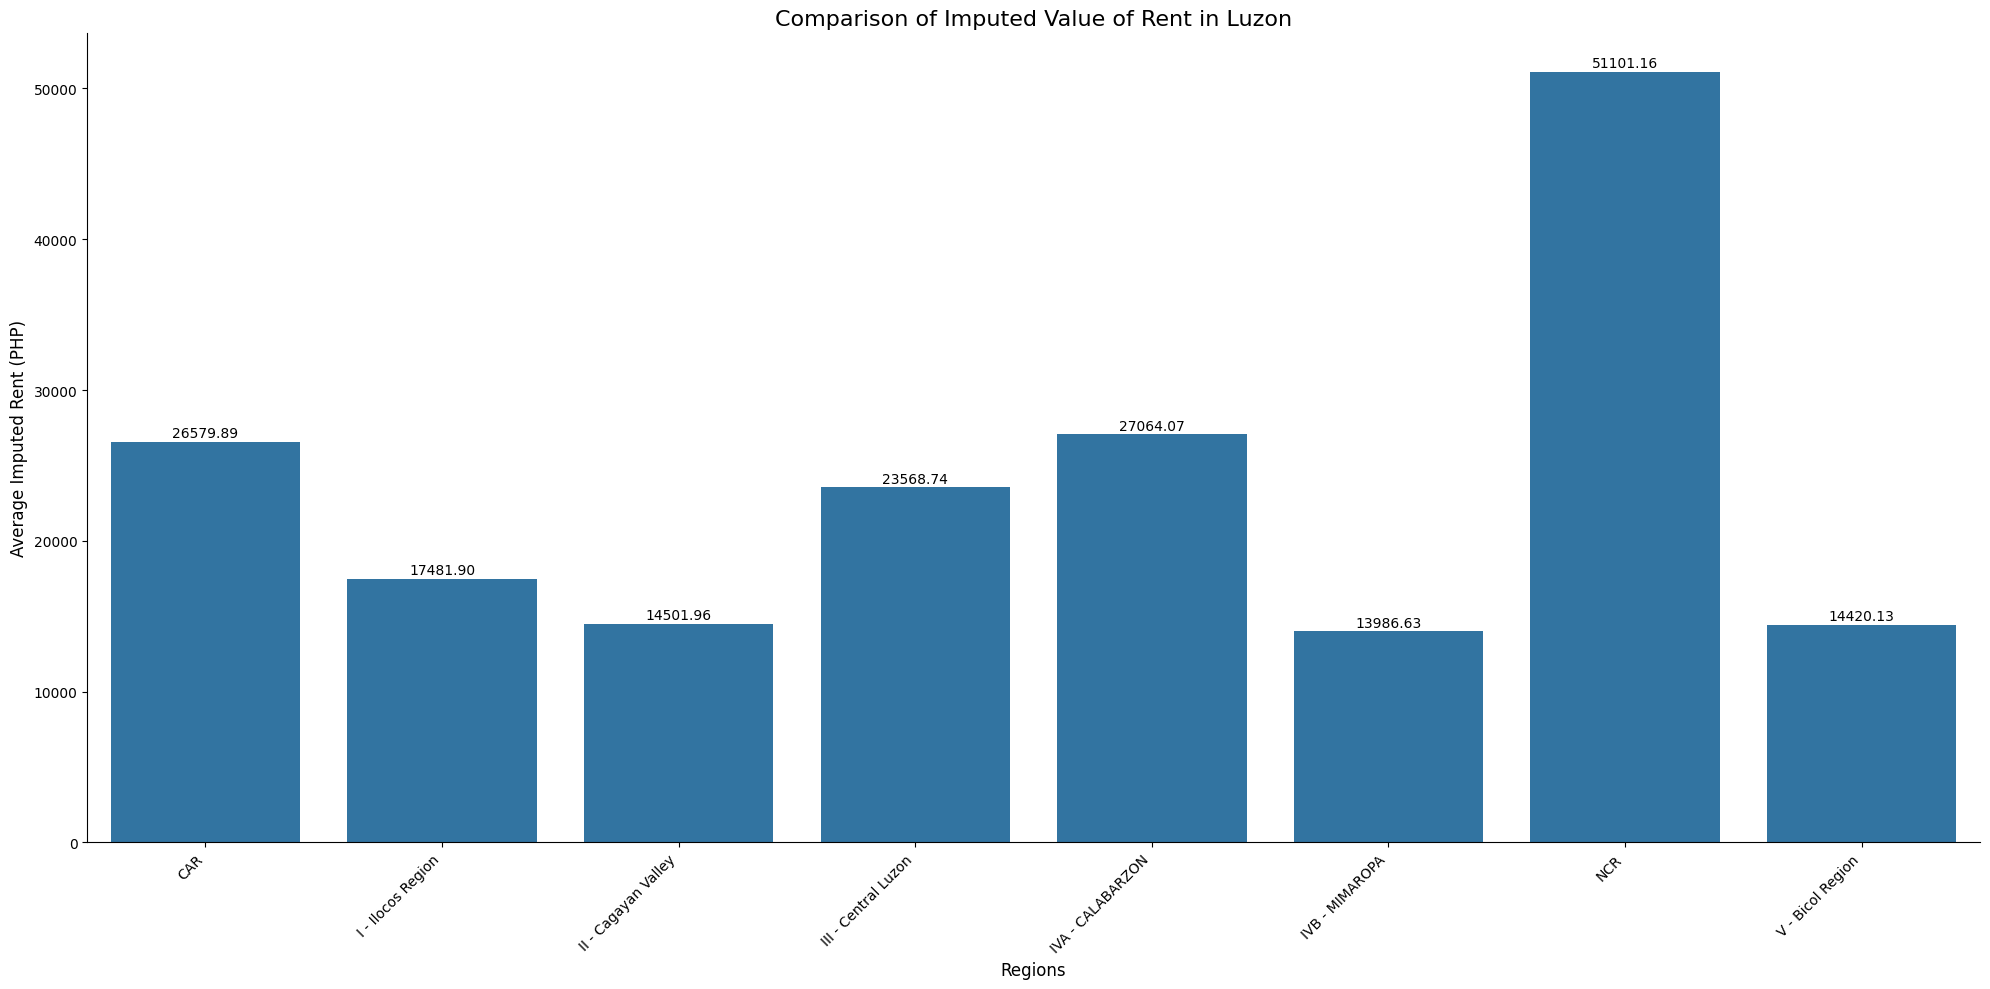

In [71]:
imputed_rental_per_region_luzon = luzon.groupby('Region')['Imputed House Rental Value'].mean()

plt.figure(figsize=(20, 10))  # Increased height for better label visibility
sns.barplot(x=imputed_rental_per_region_luzon.index, y=imputed_rental_per_region_luzon.values)

plt.title('Comparison of Imputed Value of Rent in Luzon', fontsize=16)
plt.xlabel('Regions', fontsize=12)
plt.ylabel('Average Imputed Rent (PHP)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and align labels

# Add value labels on top of the bars
for index, value in enumerate(imputed_rental_per_region_luzon.values):
    plt.text(index, value + 100, f'{value:.2f}', ha='center', va='bottom', fontsize=10)  # Format values

sns.despine()
plt.tight_layout()
plt.show()

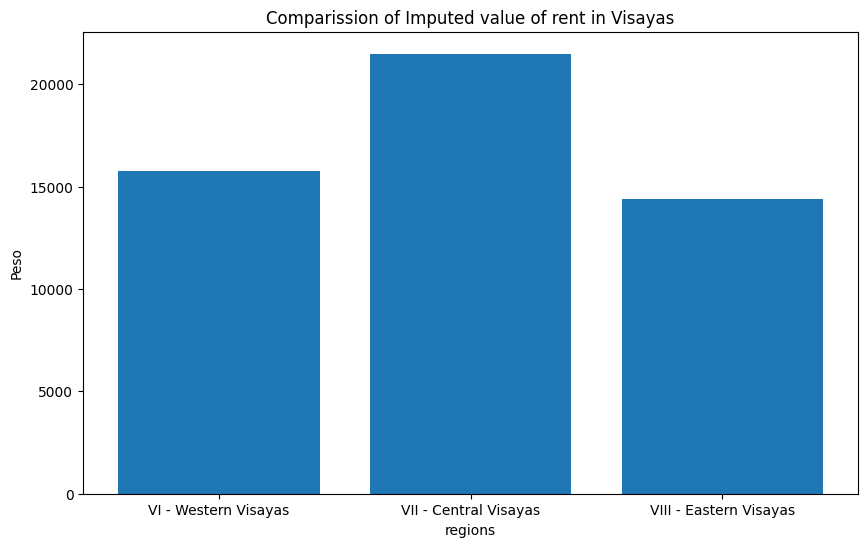

In [44]:

imputed_rental_per_region_visayas = visayas.groupby(['Region'])['Imputed House Rental Value'].mean()

plt.figure(figsize=(10, 6))  
plt.title('Comparission of Imputed value of rent in Visayas')
plt.xlabel('regions')
plt.ylabel('Peso')
plt.bar(imputed_rental_per_region_visayas.index, imputed_rental_per_region_visayas.values)
plt.show()


['Caraga' 'ARMM' 'X - Northern Mindanao' 'XI - Davao Region'
 'XII - SOCCSKSARGEN']


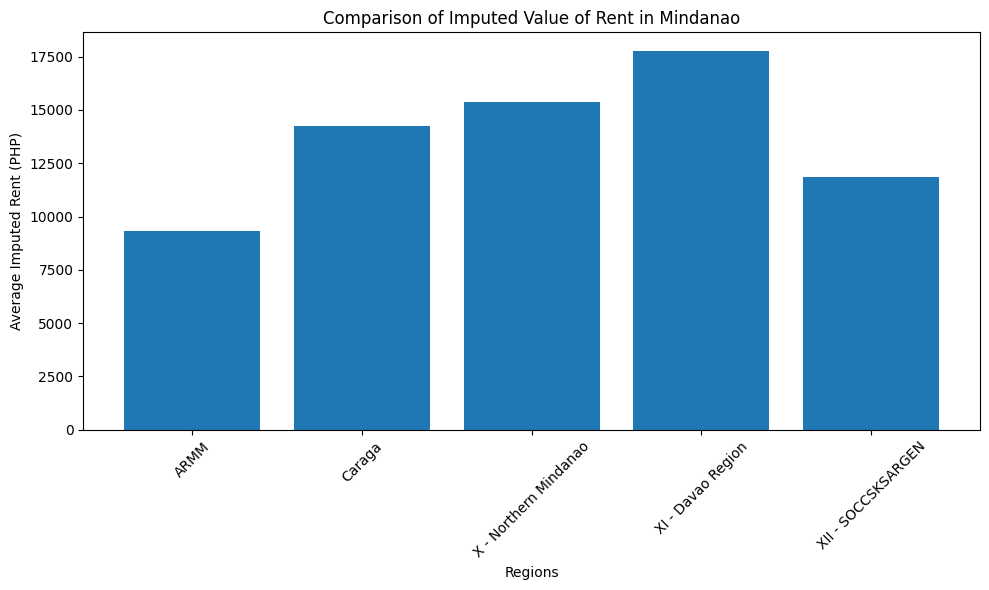

In [45]:


# Check if only Mindanao regions remain
print(mindanao['Region'].unique())  # Debugging check

# Plot
imputed_rental_per_region_mindanao = mindanao.groupby('Region')['Imputed House Rental Value'].mean()

plt.figure(figsize=(10, 6))
plt.title('Comparison of Imputed Value of Rent in Mindanao')
plt.xlabel('Regions')
plt.ylabel('Average Imputed Rent (PHP)')
plt.bar(imputed_rental_per_region_mindanao.index, imputed_rental_per_region_mindanao.values)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h2>6. Toilet & Water Access as a Poverty Indicator</h2>


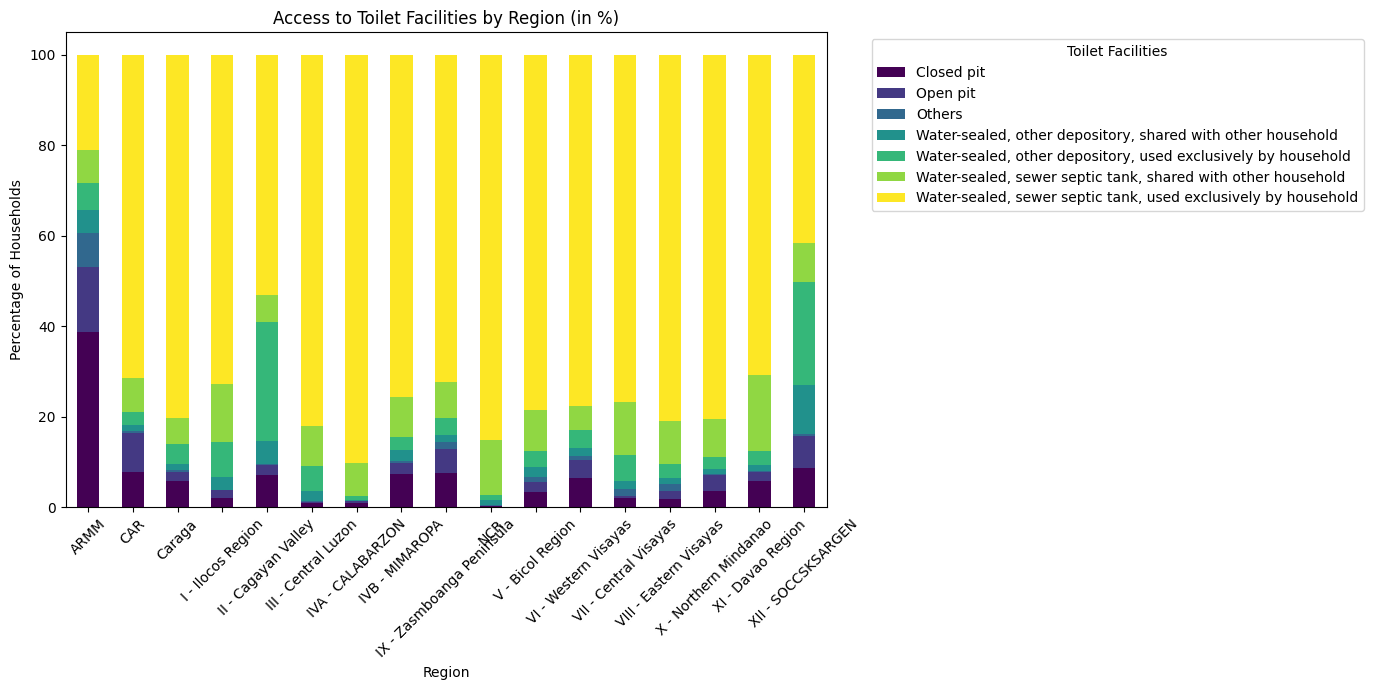

In [46]:
toilet_region = census.groupby(['Region', 'Toilet Facilities']).size().unstack().fillna(0)

# Normalize to percent per region (optional for comparison)
toilet_region_percent = toilet_region.div(toilet_region.sum(axis=1), axis=0) * 100

# Plot
toilet_region_percent.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Access to Toilet Facilities by Region (in %)')
plt.xlabel('Region')
plt.ylabel('Percentage of Households')
plt.xticks(rotation=45)
plt.legend(title='Toilet Facilities', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


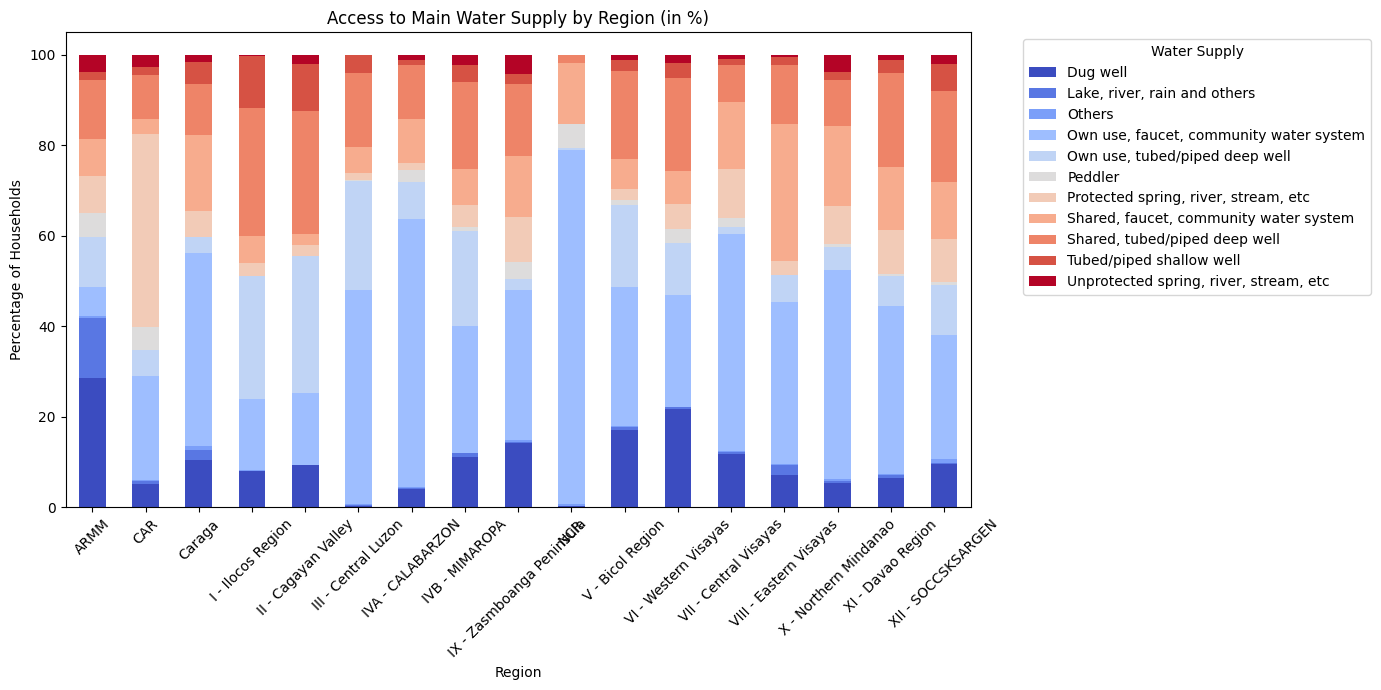

In [47]:
water_region = census.groupby(['Region', 'Main Source of Water Supply']).size().unstack().fillna(0)
water_region_percent = water_region.div(water_region.sum(axis=1), axis=0) * 100

# Plot
water_region_percent.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='coolwarm')
plt.title('Access to Main Water Supply by Region (in %)')
plt.xlabel('Region')
plt.ylabel('Percentage of Households')
plt.xticks(rotation=45)
plt.legend(title='Water Supply', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<h2>7. Large Families, Small Budgets</h2>


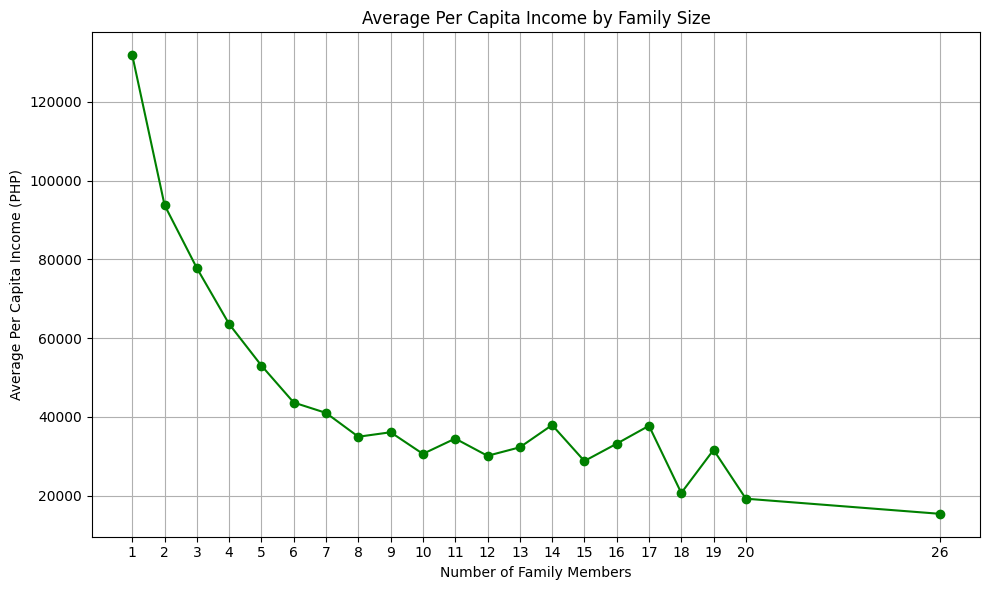

In [48]:
# Avoid division by zero
census = census[census['Total Number of Family members'] > 0].copy()
census['Per Capita Income'] = census['Total Household Income'] / census['Total Number of Family members']

# Average per capita income by family size
avg_per_capita = census.groupby('Total Number of Family members')['Per Capita Income'].mean()

# Plot
plt.figure(figsize=(10, 6))
avg_per_capita.plot(kind='line', marker='o', color='green')
plt.title('Average Per Capita Income by Family Size')
plt.xlabel('Number of Family Members')
plt.ylabel('Average Per Capita Income (PHP)')
plt.grid(True)
plt.xticks(avg_per_capita.index) 
plt.tight_layout()
plt.show()


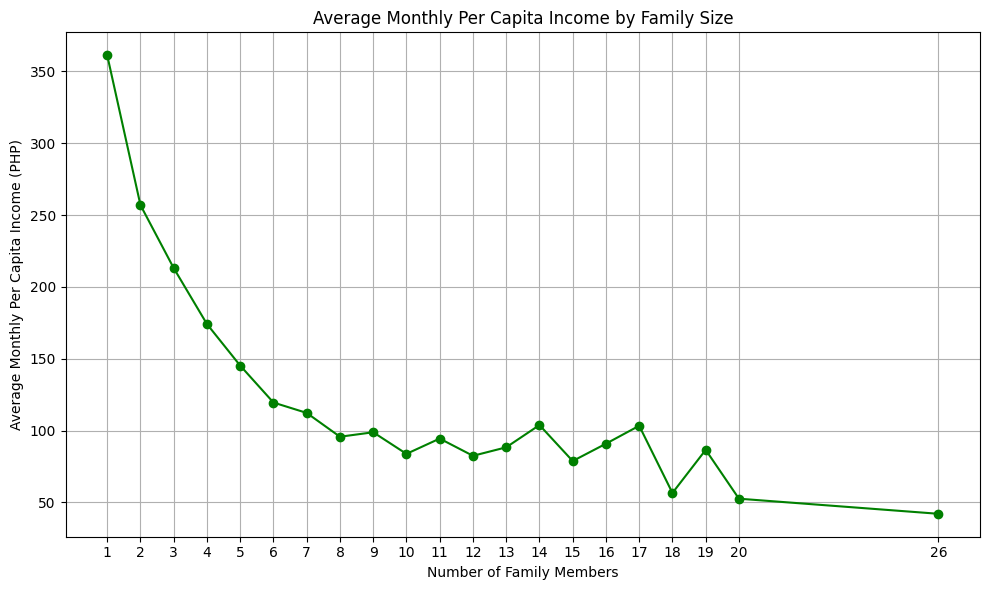

In [49]:
# Avoid division by zero
census = census[census['Total Number of Family members'] > 0].copy()

# Calculate monthly per capita income
census['Per Capita Income (Monthly)'] = census['Per Capita Income'] / 12

census['Per Capita Income (daily)'] = census['Per Capita Income'] / 365

# Average monthly per capita income by family size
avg_per_capita_monthly = census.groupby('Total Number of Family members')['Per Capita Income (daily)'].mean()

# Plot
plt.figure(figsize=(10, 6))
avg_per_capita_monthly.plot(kind='line', marker='o', color='green')
plt.title('Average Monthly Per Capita Income by Family Size')
plt.xlabel('Number of Family Members')
plt.ylabel('Average Monthly Per Capita Income (PHP)')
plt.grid(True)
plt.xticks(avg_per_capita_monthly.index)
plt.tight_layout()
plt.show()


<h2>8. Does Education Suffer with More Kids?</h2>


In [50]:
#jp5

<h2>9. Child-Heavy Households and Poverty Correlation</h2>


In [70]:
# #steven
# # Optional: Filter out invalid family sizes
# census = census[census['Total Number of Family members'] > 0]

# # Create Child-Heavy Flag
# census['Child-Heavy'] = census['Members with age less than 5 year old'] >= 3

# # Poverty flag (already defined)
# # census['Poverty Status'] = census['Total Household Income'] < poverty_threshold

# # Cross-tabulation of Poverty vs Child-Heavy
# child_poverty = pd.crosstab(census['Child-Heavy'], census['Poverty Status'])

# # Normalize to get percentages
# child_poverty_percent = child_poverty.div(child_poverty.sum(axis=1), axis=0) * 100

# # Plot
# child_poverty_percent.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Set2')
# plt.title('Poverty Status by Child-Heavy Households')
# plt.xlabel('Child-Heavy Household (3 or more children)')
# plt.ylabel('Percentage of Households')
# plt.xticks([0, 1], ['Not Child-Heavy', 'Child-Heavy'], rotation=0)
# plt.tight_layout()
# plt.show()


<h2>10. Who Are the Working Poor?</h2>


In [ ]:
#steven

<h2>11. Entrepreneurial Families: Are They Better Off?</h2>


<Axes: xlabel='Main Source of Income'>

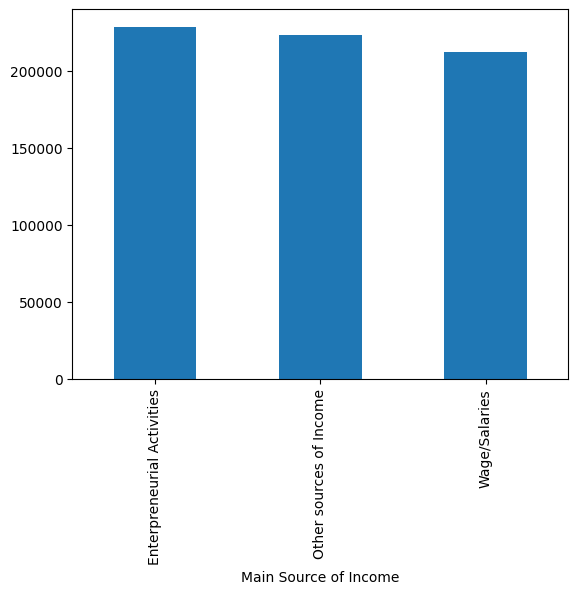

In [ ]:
#steven

#are are only slight difference between the total numner ob household income in one employed doing entreprenuerial activies 
entreprenuer = census[census['Total Income from Entrepreneurial Acitivites'] != 0 ]
entreprenuer = entreprenuer[entreprenuer['Total number of family members employed']  == 1]
#kinita pera ng wage salaries compare sa entreprenuers 

entrep_main = entreprenuer.groupby(['Main Source of Income'])['Total Household Income'].mean()

entrep_main.plot(kind='bar')

<h2>12. Occupation vs. Income Ranking</h2>


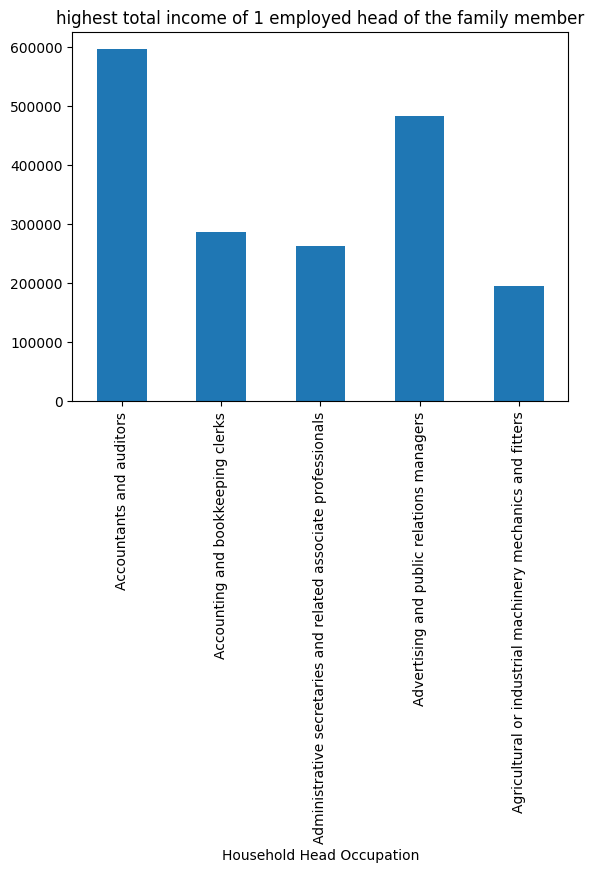

In [ ]:
#steven
census['Household Head Occupation'].value_counts()
income_head = census.groupby(['Household Head Occupation'])['Total Household Income'].mean()
income_head

#dito makikita natin na ang may pinakamalaking household na sweldo ay ang mga accountants saka auditor yan yung total bali try natin yung 
#iisa lang ang employe sa familya 
#ok still auditor 
soloworker = census[census['Total number of family members employed'] == 1]
income_head_solo = soloworker.groupby(['Household Head Occupation'])['Total Household Income'].mean().head()
income_head_solo.plot(kind='bar')
plt.title('highest total income of 1 employed head of the family member')
plt.show()

In [ ]:
census['Household Head Class of Worker'].value_counts()

Household Head Class of Worker
Self-employed wihout any employee                             13766
Worked for private establishment                              13731
Worked for government/government corporation                   2820
Employer in own family-operated farm or business               2581
Worked for private household                                    811
Worked without pay in own family-operated farm or business      285
Worked with pay in own family-operated farm or business          14
Name: count, dtype: int64

<h2>Mas alchoholic ba ang mga mahihirap at mabibisyo ba ang mahihirap kesa sa mayaman?<h2>

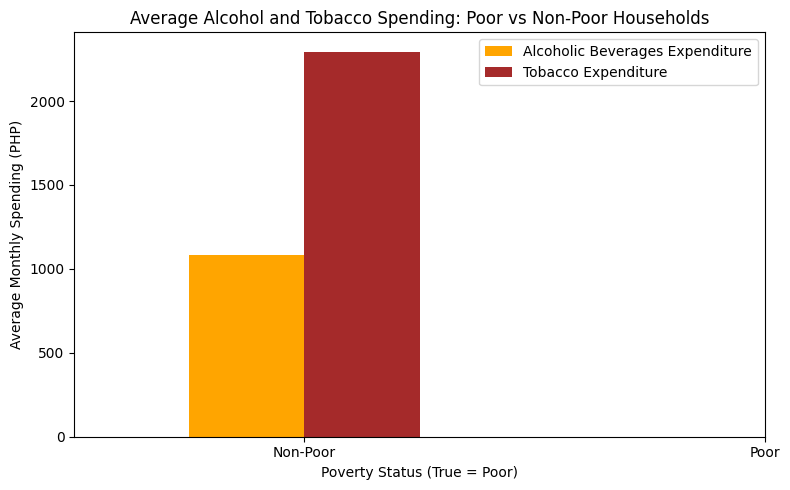

In [ ]:
# Make sure 'Poverty Status' exists
poverty_threshold = 10000
census['Poverty Status'] = census['Total Household Income'] < poverty_threshold

# Group by Poverty Status and calculate mean expenditures
alcohol_tobacco = census.groupby('Poverty Status')[
    ['Alcoholic Beverages Expenditure', 'Tobacco Expenditure']
].mean()

# Plot absolute spending
alcohol_tobacco.plot(kind='bar', figsize=(8, 5), color=['orange', 'brown'])
plt.title('Average Alcohol and Tobacco Spending: Poor vs Non-Poor Households')
plt.xlabel('Poverty Status (True = Poor)')
plt.ylabel('Average Monthly Spending (PHP)')
plt.xticks([0, 1], ['Non-Poor', 'Poor'], rotation=0)
plt.tight_layout()
plt.show()


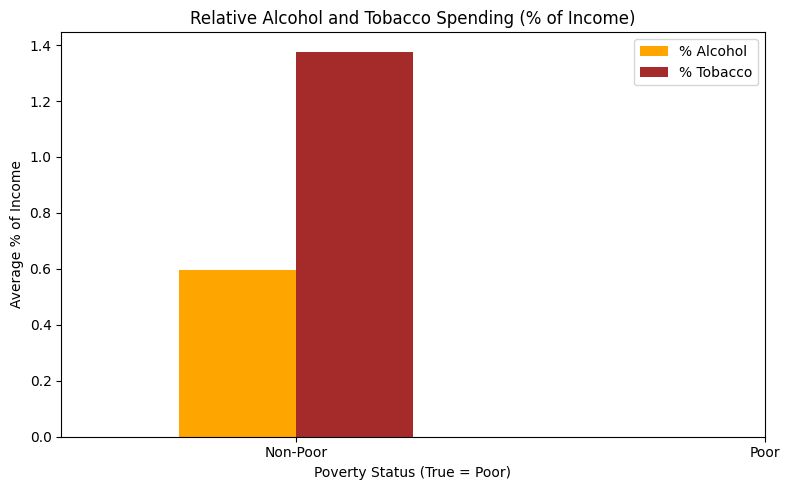

In [ ]:
# Avoid division by zero
census = census[census['Total Household Income'] > 0]
census['Poverty Status'] = census['Total Household Income'] < poverty_threshold

# Compute percentage of income spent on alcohol and tobacco
census['% Alcohol'] = census['Alcoholic Beverages Expenditure'] / census['Total Household Income'] * 100
census['% Tobacco'] = census['Tobacco Expenditure'] / census['Total Household Income'] * 100

# Compare averages
relative_spending = census.groupby('Poverty Status')[['% Alcohol', '% Tobacco']].mean()

# Plot percentage spending
relative_spending.plot(kind='bar', figsize=(8, 5), color=['orange', 'brown'])
plt.title('Relative Alcohol and Tobacco Spending (% of Income)')
plt.xlabel('Poverty Status (True = Poor)')
plt.ylabel('Average % of Income')
plt.xticks([0, 1], ['Non-Poor', 'Poor'], rotation=0)
plt.tight_layout()
plt.show()


<h2>13. Food vs. Vices</h2>


In [ ]:
#steven

<h2>14. Education vs. Entertainment Spending</h2>


In [ ]:
#jp6

<h2>15. Medical vs. Special Occasions: What Hurts Families Most?</h2>


In [ ]:
#jp7

<h2>16. Digital Divide Across Regions</h2>


In [ ]:
#steven



Number of Cellular phone
2     5837
1     5770
3     3567
0     2599
4     2085
5      944
6      413
7      161
8       99
9       34
10      33
Name: count, dtype: int64

<h2>17. Are Airconditioners and Cars a Sign of Wealth?</h2>


In [ ]:
#jp8

<h2>18. Appliance Ownership vs. Basic Needs</h2>


In [ ]:
#steven

<h2>19. Does the Head’s Education Affect Household Income?</h2>


In [ ]:
#steven

<h2>20. Are Educated Heads Better at Budgeting?</h2>


In [ ]:
#steven 

<h2>21. The “Invisible Rich”: Low Income, High Assets</h2>


In [ ]:
#steven

<h2>22. High Expenditure, Low Income = Debt?</h2>


In [ ]:
#steven

<h2>23. Senior-Headed Households: Are They Poorer?</h2>


In [ ]:
#steven

<h2>24. Gender and Poverty</h2>


In [ ]:
#jp9

<h2>25. Who Spends More on Transportation?</h2>


In [ ]:
#jp10